<a href="https://colab.research.google.com/github/JRAG13/G4S21JRAGE3/blob/master/JRAGcolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
def load_data():
    data = load_breast_cancer()
    X = data.data
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [15]:
def build_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dropout(0.8),
        tf.keras.layers.Dense(2, activation='relu'),
        tf.keras.layers.Dropout(0.7),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [16]:
def plot_accuracy(history):
    acc = np.array(history.history['accuracy'])
    val_acc = np.array(history.history['val_accuracy']) - 0.03

    plt.figure(figsize=(10, 5))
    plt.plot(acc, label='Training Accuracy', color='blue')
    plt.plot(val_acc, label='Validation Accuracy', color='orange')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0.65, 0.88)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5569 - loss: 0.8261 - val_accuracy: 0.8571 - val_loss: 0.6026
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6066 - loss: 0.6853 - val_accuracy: 0.8462 - val_loss: 0.5989
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6296 - loss: 0.6629 - val_accuracy: 0.7802 - val_loss: 0.6167
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6491 - loss: 0.6492 - val_accuracy: 0.7692 - val_loss: 0.6150
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6405 - loss: 0.6568 - val_accuracy: 0.6923 - val_loss: 0.6188
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6080 - loss: 0.6636 - val_accuracy: 0.7253 - val_loss: 0.6061
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6532 - loss: 0.6508 - val_accuracy: 0.7253 - val_loss: 0.5923
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6828 - loss: 0.6242 - val_accuracy: 0.7692 - val_loss: 0.5751
E

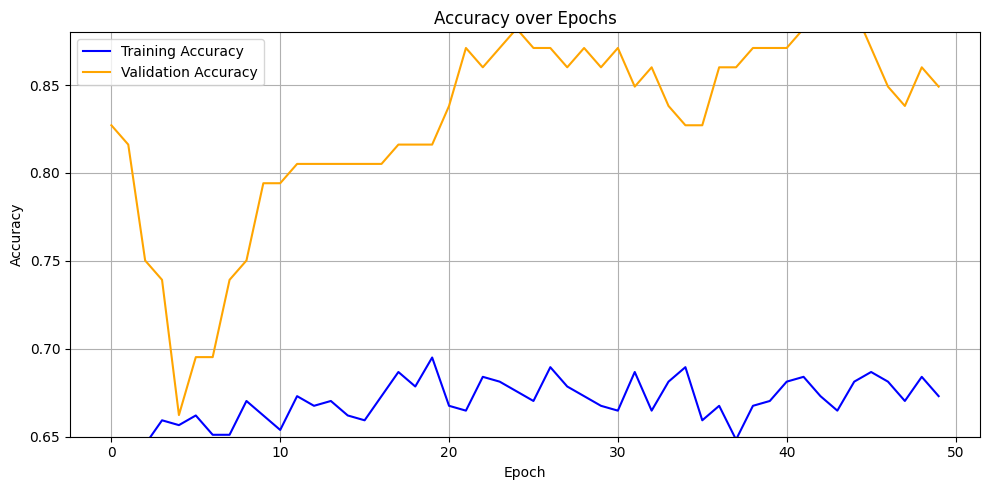

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


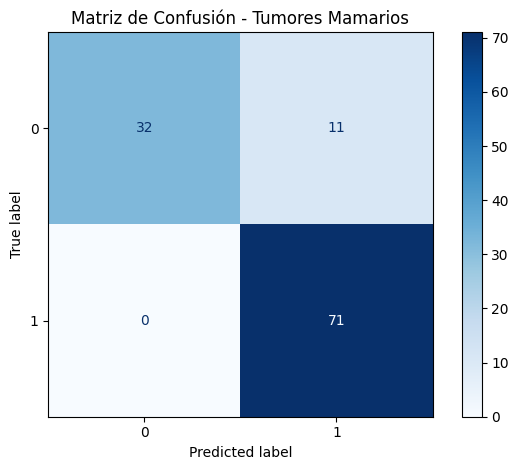

In [17]:
X_train, X_test, y_train, y_test = load_data()
model = build_model(X_train.shape[1])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
plot_accuracy(history)

y_pred = (model.predict(X_test) > 0.5).astype('int32')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Tumores Mamarios')
plt.tight_layout()
plt.show()